<a href="https://colab.research.google.com/github/YaMe17/PFA_CabinetMedicat/blob/main/DiabetesPredect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/TESTDiabetsML/")

Mounted at /TESTDiabetsML/
Drive already mounted at /TESTDiabetsML/; to attempt to forcibly remount, call drive.mount("/TESTDiabetsML/", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn

data=pd.read_csv('/content/drive/MyDrive/TESTDiabetsML/diabetes.csv')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X=data.iloc[:,0:-1].values
Y=list(data.iloc[:,-1])
print(type(X))
print(type(Y))


<class 'numpy.ndarray'>
<class 'list'>


In [ ]:
from sklearn.model_selection import train_test_split
X_Train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1,shuffle=False)
Y=np.array(Y)
print(type(x_test))

<class 'numpy.ndarray'>


In [ ]:

print(X_Train.shape)
print(y_train.shape)
print(x_test.shape)

print(y_test.shape)
print(y_test[1])

(614, 8)
(614,)
(154, 8)
(154,)
0


In [ ]:
X_Train=torch.FloatTensor(X_Train)
x_test=torch.FloatTensor(x_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [ ]:
import torch.nn as nn
class Model(nn.Module):
  def __init__(self):
    super(Model,self).__init__()
    self.fc1=torch.nn.Linear(X.shape[1],7)
    self.fc2=torch.nn.Linear(7,3)
    self.fc3=torch.nn.Linear(3,2)
    self.sigmoid=torch.nn.Sigmoid()

  def forward(self,X):
    out=self.fc1(X)
    out=self.sigmoid(out)
    out=self.fc2(out)
    out=self.sigmoid(out)
    out=self.fc3(out)
    return out 

In [ ]:
f=torch.tensor([[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0],[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0]])
print(f.shape)
net=Model()
net.forward(f)

torch.Size([2, 8])


tensor([[ 0.3547, -0.0202],
        [ 0.3547, -0.0202]], grad_fn=<AddmmBackward0>)

In [ ]:
net=Model()
loss_function=nn.CrossEntropyLoss()
optimazer=torch.optim.Adam(net.parameters(),lr=0.1)

In [ ]:
def train_MLP(model,X_Train,y_train,criterion,optimazer):
  model.train()
  running_loss=0.0
  running_corrects=0.0
  outputs=model(X_Train)
  loss=criterion(outputs,y_train)
  optimazer.zero_grad()
  loss.backward()
  optimazer.step()
  max_scores,preds=torch.max(outputs,dim=1)
  running_loss+=loss.item()*X_Train.size(0)
  running_corrects+=torch.sum(preds==y_train.data)
  epoch_loss=running_loss/len(X_Train)
  epoch_acc=running_corrects/len(X_Train)
  return epoch_acc,epoch_loss

In [ ]:
def validate_MLP(model,x_test,y_test,criterion):
  model.eval()
  running_loss=0.0
  running_correct=0.0
  outputs=model(x_test)
  loss=criterion(outputs,y_test)
  _,preds=torch.max(outputs,1)
  running_loss+=loss.item()*x_test.size(0)
  running_correct+=torch.sum(preds==y_test.data)
  epoch_loss=running_loss/len(x_test)
  epoch_acc=running_correct/len(x_test)
  return epoch_acc,epoch_loss


In [ ]:
numberIT=10000
finalLosses=[]
finalAcc=[]
pred=[]
testLoss=[]
testAcc=[]
for i in range(numberIT):
  i=i+1
  epoch_acc,epoch_loss=train_MLP(net,X_Train,y_train,loss_function,optimazer)
  finalLosses.append(epoch_loss)
  finalAcc.append(epoch_acc)
  testAc,testLos=validate_MLP(net,x_test,y_test,loss_function)
  testLoss.append(testLos)
  testAcc.append(testAc)
  if i==numberIT-4 and epoch_acc<0.9 :
    i=0
  if i%10==1:
    print("Epoch number : {} and the loss : {} ".format(i,epoch_loss))
    print("Epoch number : {} and the accuracy :{}".format(i,epoch_acc))



Epoch number : 1 and the loss : 0.7087821364402771 
Epoch number : 1 and the accuracy :0.35179153084754944
Epoch number : 11 and the loss : 0.6535601019859314 
Epoch number : 11 and the accuracy :0.653094470500946
Epoch number : 21 and the loss : 0.6438507437705994 
Epoch number : 21 and the accuracy :0.653094470500946
Epoch number : 31 and the loss : 0.6396632194519043 
Epoch number : 31 and the accuracy :0.653094470500946
Epoch number : 41 and the loss : 0.633043646812439 
Epoch number : 41 and the accuracy :0.653094470500946
Epoch number : 51 and the loss : 0.6260387897491455 
Epoch number : 51 and the accuracy :0.653094470500946
Epoch number : 61 and the loss : 0.6496915817260742 
Epoch number : 61 and the accuracy :0.5960912108421326
Epoch number : 71 and the loss : 0.6341132521629333 
Epoch number : 71 and the accuracy :0.6612377762794495
Epoch number : 81 and the loss : 0.6295263767242432 
Epoch number : 81 and the accuracy :0.6661238074302673
Epoch number : 91 and the loss : 0.

ValueError: ignored

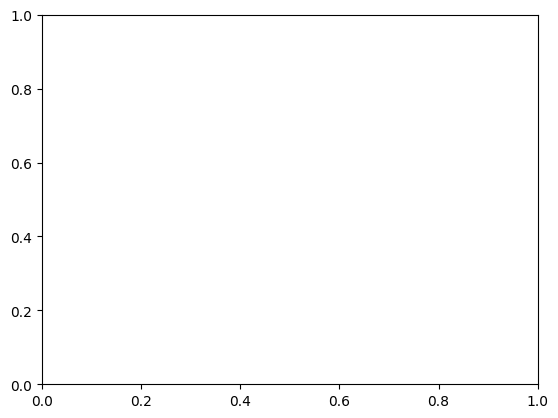

In [ ]:
plt.plot(range(numberIT),finalLosses, )
plt.plot(range(numberIT),finalAcc,)

plt.xlabel("Epoches")
plt.ylabel("accuracy")
plt.legend(["loss","Acc"])
plt.title("Train  vs tset Loss")
plt.show()


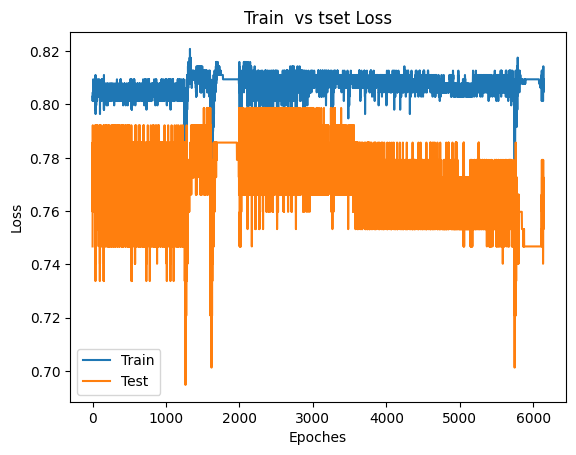

In [ ]:
plt.plot(range(numberIT),finalAcc, )
plt.plot(range(numberIT),testAcc,)

plt.xlabel("Epoches")
plt.ylabel("Loss")
plt.legend(["Train","Test"])
plt.title("Train  vs tset Loss")
plt.show()

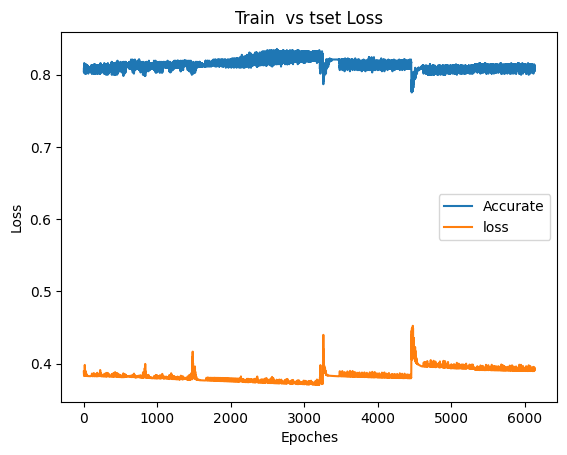

tensor(1)


In [ ]:

plt.plot(range(numberIT),finalAcc, )
plt.plot(range(numberIT),finalLosses,)
plt.xlabel("Epoches")
plt.ylabel("Loss")
plt.legend(["Accurate","loss"])
plt.title("Train  vs tset Loss")
plt.show()
print(y_test[0])

Enter input 1: 
6
Enter input 2: 
148
Enter input 3: 
72
Enter input 4: 
35
Enter input 5: 
0
Enter input 6: 
33.6
Enter input 7: 
0.627
Enter input 8: 
50
Prediction: Positive
Prediction: Positive
Prediction: Positive
Prediction: Positive
Prediction: Positive
Prediction: Positive
Prediction: Positive
Prediction: Positive
Prediction: Positive
Prediction: Positive


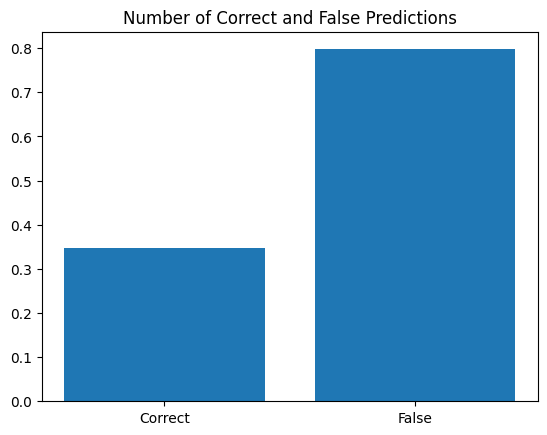

In [ ]:
model = Model() 
model.eval()
finalLosses=[]
finalAcc=[]
correct_preds = 0
false_preds = 0
testLoss=[]
testAcc=[]
new_data = []

for i in range(8):
    print(f"Enter input {i+1}: ")
    new_input = input()
    new_data.append(float(new_input))

new_data = torch.tensor([new_data], dtype=torch.float32)

with torch.no_grad():
    output = model(new_data)

_, predicted = torch.max(output, 1)

for i in range(10):
    epoch_acc, epoch_loss = train_MLP(model, X_Train, y_train, loss_function, optimazer)
    finalLosses.append(epoch_loss)
    finalAcc.append(epoch_acc)
    if predicted == 0:
        print("Prediction: Negative")
    else:
        print("Prediction: Positive")


plt.bar(["Correct", "False"], [epoch_acc, epoch_loss])
plt.title("Number of Correct and False Predictions")
plt.show()



In [ ]:
XX= X_Train[0, 1]
print(XX)

tensor(148.)
